In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression

In [126]:
df=pd.read_csv('C:/Users/HP/Downloads/Datasets/fuel.csv')

# Exploratory Data Analysis

Analyse de forme

In [127]:
df.head()

Model Year   Make              Model Vehicle Class  Engine Size(L)  \
0        2022  Acura                ILX       Compact             2.4   
1        2022  Acura         MDX SH-AWD    SUV: Small             3.5   
2        2022  Acura         RDX SH-AWD    SUV: Small             2.0   
3        2022  Acura  RDX SH-AWD A-SPEC    SUV: Small             2.0   
4        2022  Acura         TLX SH-AWD       Compact             2.0   

   Cylinders Transmission Fuel Type  Fuel Consumption (City (L/100 km)  \
0          4          AM8         Z                                9.9   
1          6         AS10         Z                               12.6   
2          4         AS10         Z                               11.0   
3          4         AS10         Z                               11.3   
4          4         AS10         Z                               11.2   

   Fuel Consumption(Hwy (L/100 km))  Fuel Consumption(Comb (L/100 km))  \
0                               7.0                                8.6   
1                               9.4                               11.2   
2                               8.6                                9.9   
3                               9.1                               10.3   
4                               8.0                                9.8   

   Fuel Consumption(Comb (mpg))  CO2 Emissions(g/km)  CO2 Rating  Smog Rating  
0                            33                  200           6            3  
1                            25                  263           4            5  
2                            29                  232           5            6  
3                            27                  242           5            6  
4                            29                  230           5            7

In [128]:
pd.set_option('display.max_row',None)
pd.set_option('display.max_column',None)

In [129]:
df

Model Year           Make  \
0          2022          Acura   
1          2022          Acura   
2          2022          Acura   
3          2022          Acura   
4          2022          Acura   
5          2022          Acura   
6          2022          Acura   
7          2022          Acura   
8          2022     Alfa Romeo   
9          2022     Alfa Romeo   
10         2022     Alfa Romeo   
11         2022     Alfa Romeo   
12         2022     Alfa Romeo   
13         2022     Alfa Romeo   
14         2022   Aston Martin   
15         2022   Aston Martin   
16         2022   Aston Martin   
17         2022   Aston Martin   
18         2022   Aston Martin   
19         2022           Audi   
20         2022           Audi   
21         2022           Audi   
22         2022           Audi   
23         2022           Audi   
24         2022           Audi   
25         2022           Audi   
26         2022           Audi   
27         2022           Audi   
28         2022           Audi   
29         2022           Audi   
30         2022           Audi   
31         2022           Audi   
32         2022           Audi   
33         2022           Audi   
34         2022           Audi   
35         2022           Audi   
36         2022           Audi   
37         2022           Audi   
38         2022           Audi   
39         2022           Audi   
40         2022           Audi   
41         2022           Audi   
42         2022           Audi   
43         2022           Audi   
44         2022           Audi   
45         2022           Audi   
46         2022           Audi   
47         2022           Audi   
48         2022           Audi   
49         2022           Audi   
50         2022           Audi   
51         2022           Audi   
52         2022           Audi   
53         2022           Audi   
54         2022           Audi   
55         2022           Audi   
56         2022           Audi   
57         2022           Audi   
58         2022           Audi   
59         2022           Audi   
60         2022           Audi   
61         2022           Audi   
62         2022           Audi   
63         2022           Audi   
64         2022        Bentley   
65         2022        Bentley   
66         2022        Bentley   
67         2022        Bentley   
68         2022        Bentley   
69         2022        Bentley   
70         2022        Bentley   
71         2022        Bentley   
72         2022            BMW   
73         2022            BMW   
74         2022            BMW   
75         2022            BMW   
76         2022            BMW   
77         2022            BMW   
78         2022            BMW   
79         2022            BMW   
80         2022            BMW   
81         2022            BMW   
82         2022            BMW   
83         2022            BMW   
84         2022            BMW   
85         2022            BMW   
86         2022            BMW   
87         2022            BMW   
88         2022            BMW   
89         2022            BMW   
90         2022            BMW   
91         2022            BMW   
92         2022            BMW   
93         2022            BMW   
94         2022            BMW   
95         2022            BMW   
96         2022            BMW   
97         2022            BMW   
98         2022            BMW   
99         2022            BMW   
100        2022            BMW   
101        2022            BMW   
102        2022            BMW   
103        2022            BMW   
104        2022            BMW   
105        2022            BMW   
106        2022            BMW   
107        2022            BMW   
108        2022            BMW   
109        2022            BMW   
110        2022            BMW   
111        2022            BMW   
112        2022            BMW   
113        2022            BMW   
114        2022            BMW   
115        2022            BMW   
116        2022            

In [130]:
df.shape

(946, 15)

In [131]:
df.dtypes

Model Year                             int64
Make                                  object
Model                                 object
Vehicle Class                         object
Engine Size(L)                       float64
Cylinders                              int64
Transmission                          object
Fuel Type                             object
Fuel Consumption (City (L/100 km)    float64
Fuel Consumption(Hwy (L/100 km))     float64
Fuel Consumption(Comb (L/100 km))    float64
Fuel Consumption(Comb (mpg))           int64
CO2 Emissions(g/km)                    int64
CO2 Rating                             int64
Smog Rating                            int64
dtype: object

In [132]:
df.dtypes.value_counts()

int64      6
object     5
float64    4
Name: count, dtype: int64

In [133]:
df.isna().sum()/df.shape[0]

Model Year                           0.0
Make                                 0.0
Model                                0.0
Vehicle Class                        0.0
Engine Size(L)                       0.0
Cylinders                            0.0
Transmission                         0.0
Fuel Type                            0.0
Fuel Consumption (City (L/100 km)    0.0
Fuel Consumption(Hwy (L/100 km))     0.0
Fuel Consumption(Comb (L/100 km))    0.0
Fuel Consumption(Comb (mpg))         0.0
CO2 Emissions(g/km)                  0.0
CO2 Rating                           0.0
Smog Rating                          0.0
dtype: float64

<Axes: >

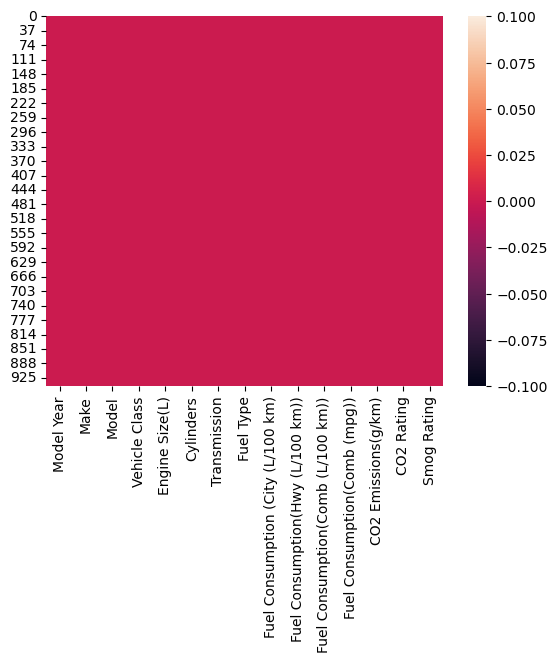

In [134]:
sns.heatmap(df.isna())

Analyse de fond

In [135]:
df["CO2 Emissions(g/km)"].value_counts()

CO2 Emissions(g/km)
275    15
252    13
289    12
323    12
271    11
322    11
221    11
281    11
260    10
214    10
279    10
274    10
263    10
277     9
245     9
211     9
256     9
327     9
233     8
305     8
241     8
262     8
224     8
184     8
345     8
326     8
354     7
222     7
229     7
321     7
198     7
219     7
195     7
216     7
249     7
232     7
178     7
242     7
220     7
218     7
205     7
200     6
314     6
190     6
207     6
213     6
189     6
296     6
258     6
186     6
208     6
253     6
331     6
230     6
286     6
265     6
298     6
209     6
239     5
185     5
170     5
352     5
182     5
181     5
353     5
225     5
269     5
304     5
283     5
270     5
292     5
325     5
267     5
287     5
273     5
299     5
202     5
227     5
364     5
174     5
332     4
336     4
246     4
236     4
247     4
284     4
272     4
254     4
347     4
387     4
238     4
231     4
329     4
359     4
339     4
308     4
165     4
179     4


In [136]:
df["CO2 Emissions(g/km)"].describe()

count    946.000000
mean     259.172304
std       64.443149
min       94.000000
25%      213.250000
50%      257.000000
75%      300.750000
max      608.000000
Name: CO2 Emissions(g/km), dtype: float64

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Count'>

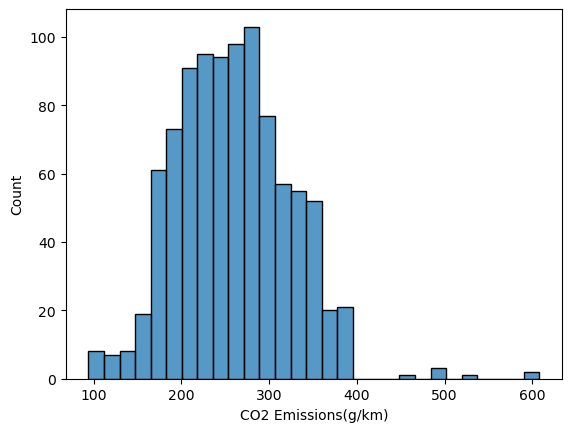

In [137]:
sns.histplot(data=df,x="CO2 Emissions(g/km)")

In [138]:
df_x=df.drop(["CO2 Emissions(g/km)"],axis=1)
df_y=df["CO2 Emissions(g/km)"]

C:\Users\HP\AppData\Local\Temp\ipykernel_9968\2986560251.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(30,25))


<Figure size 3000x2500 with 0 Axes>

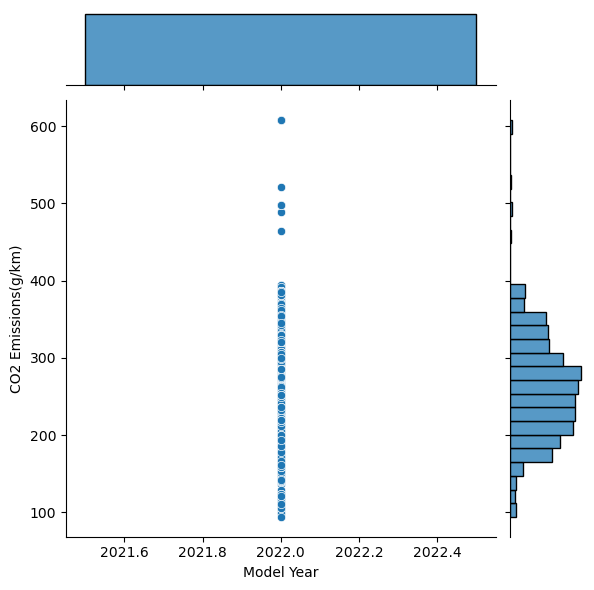

<Figure size 3000x2500 with 0 Axes>

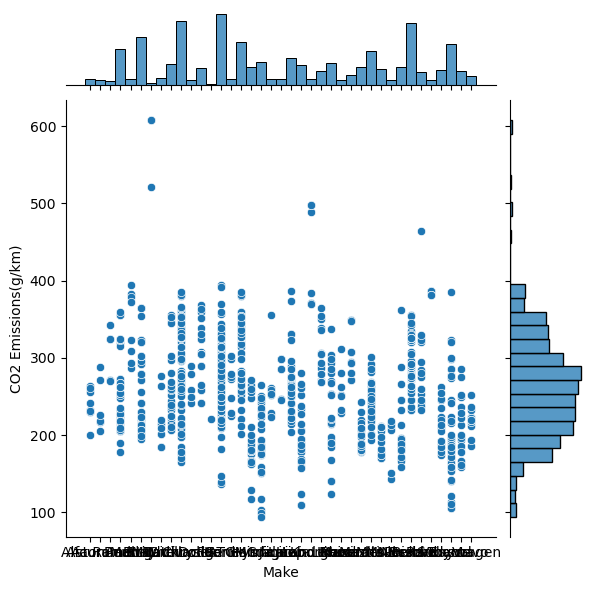

<Figure size 3000x2500 with 0 Axes>

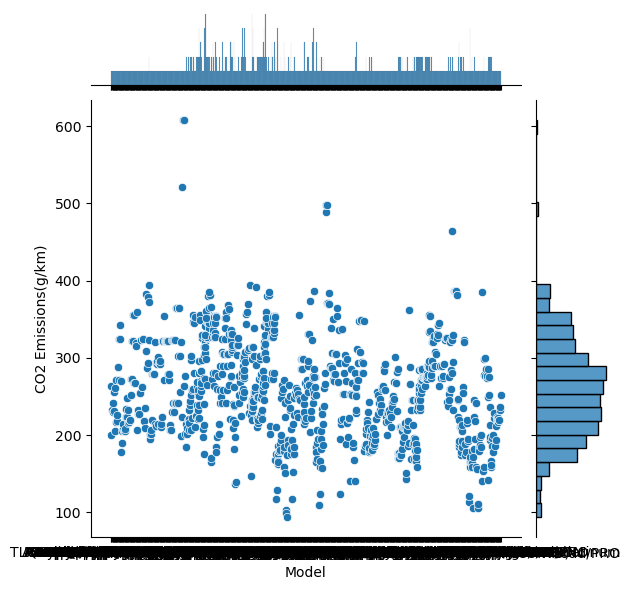

<Figure size 3000x2500 with 0 Axes>

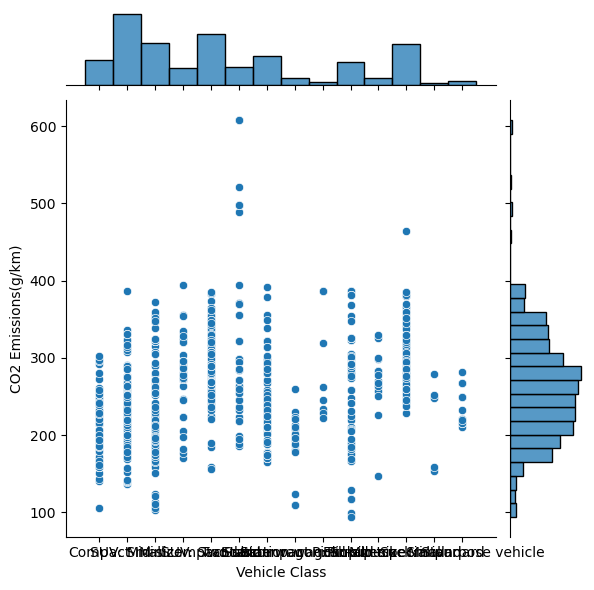

<Figure size 3000x2500 with 0 Axes>

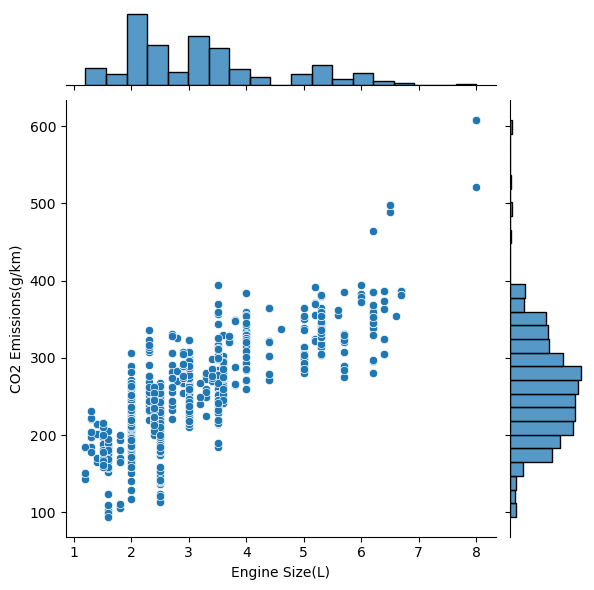

<Figure size 3000x2500 with 0 Axes>

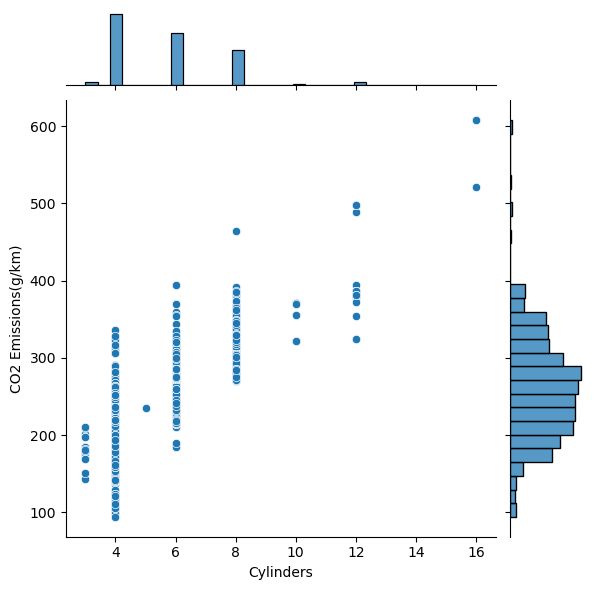

<Figure size 3000x2500 with 0 Axes>

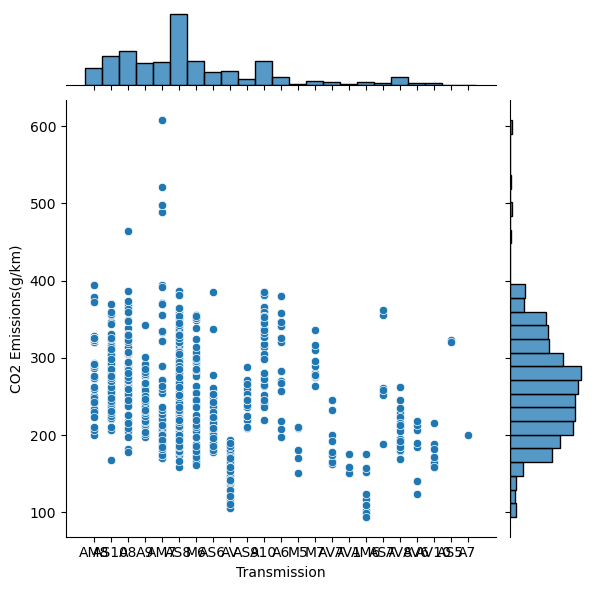

<Figure size 3000x2500 with 0 Axes>

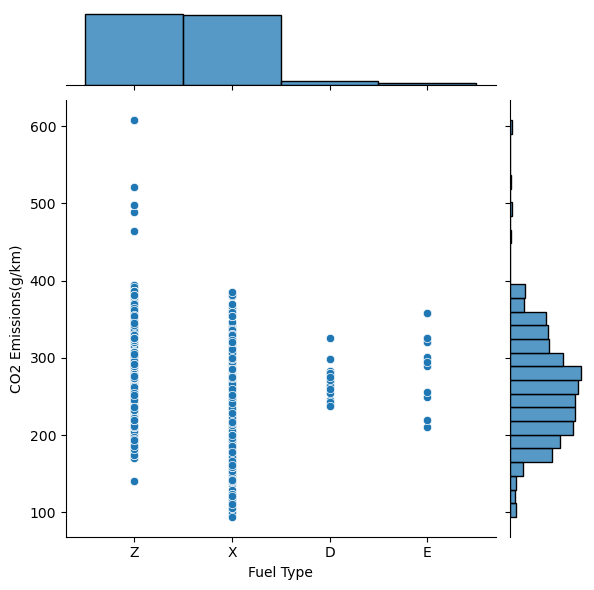

<Figure size 3000x2500 with 0 Axes>

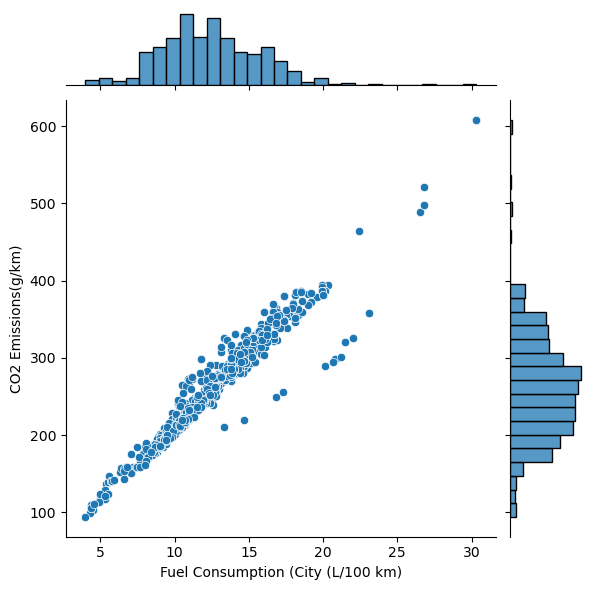

<Figure size 3000x2500 with 0 Axes>

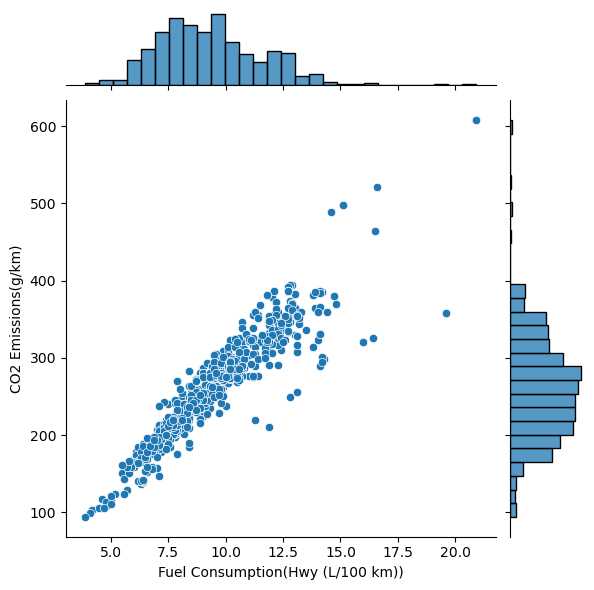

<Figure size 3000x2500 with 0 Axes>

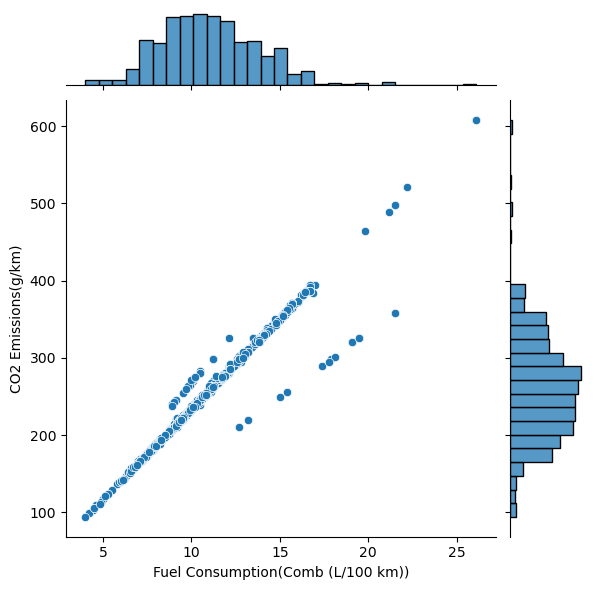

<Figure size 3000x2500 with 0 Axes>

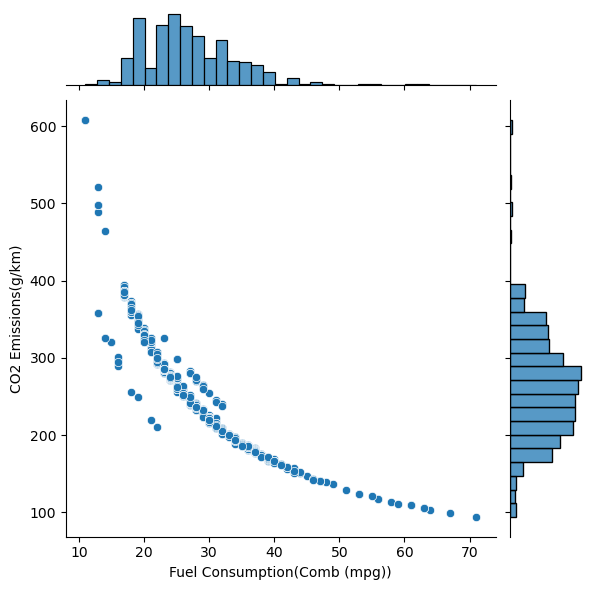

<Figure size 3000x2500 with 0 Axes>

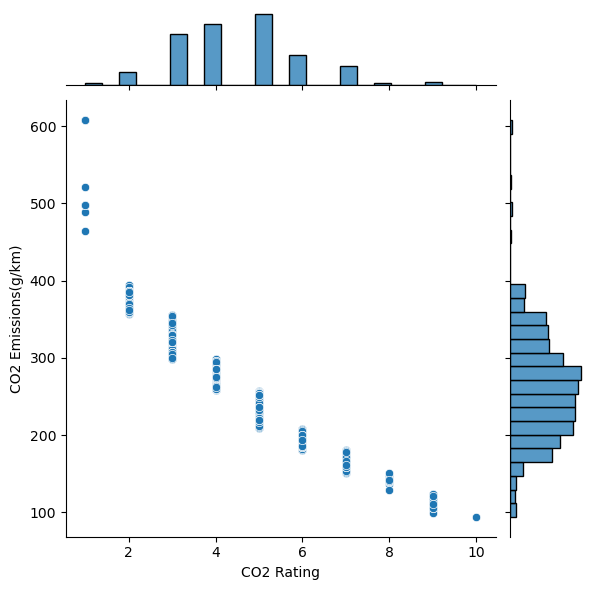

<Figure size 3000x2500 with 0 Axes>

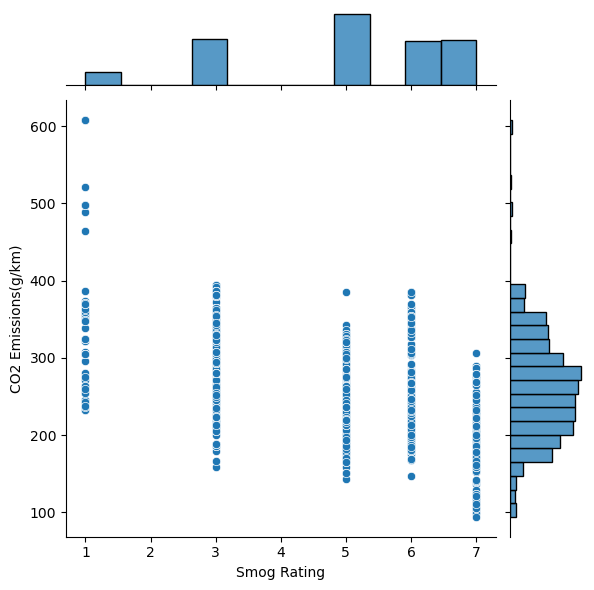

In [139]:
for col in df_x.columns:
    plt.figure(figsize=(30,25))
    sns.jointplot(data=df, x=col,y="CO2 Emissions(g/km)")

Suppresssion des colonnes non nécessaires

In [140]:
df.nunique()

Model Year                             1
Make                                  39
Model                                715
Vehicle Class                         14
Engine Size(L)                        36
Cylinders                              8
Transmission                          23
Fuel Type                              4
Fuel Consumption (City (L/100 km)    149
Fuel Consumption(Hwy (L/100 km))     107
Fuel Consumption(Comb (L/100 km))    131
Fuel Consumption(Comb (mpg))          49
CO2 Emissions(g/km)                  242
CO2 Rating                            10
Smog Rating                            5
dtype: int64

In [141]:
df_x=df_x.drop(["Model Year","Fuel Consumption(Comb (mpg))","CO2 Rating","Smog Rating","Model"], axis=1)

# Preprocessing

Split data into train set and test set

In [142]:
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.2)

In [143]:
x_train.shape

(756, 9)

In [144]:
x_test.shape

(190, 9)

In [145]:
y_test.shape

(190,)

In [146]:
y_test

341    231
585    219
385    274
277    221
640    178
575    305
414    327
814    274
774    275
54     254
188    326
71     373
106    279
368    225
833    465
236    327
378    259
499    240
375    221
374    279
785    296
133    608
336    238
98     271
282    336
266    359
253    249
221    352
468    235
286    314
837    330
759    263
715    210
271    258
748    236
506    263
497    214
892    241
310    256
866    321
942    219
381    263
66     287
470    183
930    178
169    269
127    302
544    182
156    258
274    265
94     224
818    323
135    263
242    353
654    202
847    224
670    283
889    246
717    143
553    238
386    245
48     206
741    171
180    355
802    305
92     211
683    224
546    195
423    332
139    184
317    298
580    294
743    189
876    166
53     254
232    354
444    181
658    252
529    285
590    280
669    287
852    192
941    219
362    249
457    223
540    110
830    260
618    271
538    195
605    268
306    269

In [147]:
x_train

Make            Vehicle Class  Engine Size(L)  Cylinders  \
692  Mercedes-Benz  Special purpose vehicle             2.0          4   
476        Hyundai               SUV: Small             1.6          4   
63            Audi               Subcompact             2.0          4   
869         Toyota                 Mid-size             2.5          4   
239      Chevrolet            SUV: Standard             5.3          8   
905         Toyota                  Minivan             2.5          4   
352           Ford               Subcompact             5.0          8   
369        Genesis                Full-size             3.5          6   
462        Hyundai               SUV: Small             2.0          4   
485       Infiniti               SUV: Small             2.0          4   
475        Hyundai               SUV: Small             2.5          4   
935          Volvo                  Compact             2.0          4   
773        Porsche              Minicompact             3.0          6   
388            GMC   Pickup truck: Standard             5.3          8   
38            Audi            SUV: Standard             3.0          6   
68         Bentley              Minicompact             4.0          8   
647          Mazda                 Mid-size             2.5          4   
325           Ford   Pickup truck: Standard             5.0          8   
7            Acura                  Compact             3.0          6   
212      Chevrolet   Pickup truck: Standard             5.3          8   
173      Chevrolet               SUV: Small             3.6          6   
467        Hyundai               SUV: Small             2.5          4   
190      Chevrolet               Two-seater             6.2          8   
526           Jeep               SUV: Small             3.0          6   
230      Chevrolet            SUV: Standard             3.0          6   
887         Toyota               SUV: Small             2.0          4   
686  Mercedes-Benz            SUV: Standard             2.0          4   
195      Chevrolet   Pickup truck: Standard             2.7          4   
340           Ford               Subcompact             2.3          4   
649          Mazda                 Mid-size             2.5          4   
216      Chevrolet   Pickup truck: Standard             5.3          8   
178      Chevrolet               Subcompact             6.2          8   
878         Toyota                  Compact             1.8          4   
303           Ford            SUV: Standard             3.5          6   
257          Dodge                 Mid-size             5.7          8   
675  Mercedes-Benz                  Compact             2.0          4   
424            GMC            SUV: Standard             3.0          6   
674  Mercedes-Benz               Subcompact             2.0          4   
395            GMC   Pickup truck: Standard             5.3          8   
331           Ford   Pickup truck: Standard             3.5          6   
543            Kia                  Compact             1.6          4   
772        Porsche              Minicompact             3.0          6   
925     Volkswagen                  Compact             1.5          4   
301           Ford            SUV: Standard             3.5          6   
157       Cadillac                 Mid-size             3.0          6   
292           Ford               SUV: Small             2.0          4   
299           Ford               SUV: Small             2.5          4   
461        Hyundai               SUV: Small             2.0          4   
204      Chevrolet   Pickup truck: Standard             3.0          6   
417            GMC            SUV: Standard             5.3          8   
749        Porsche               Two-seater             2.0          4   
651          Mazda               Two-seater             2.0          4   
466        Hyundai      Pickup truck: Small             2.5          4   
859         Subaru

Encoding

In [148]:
ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
ohe.set_output(transform='pandas')

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [149]:
ohefit = ohe.fit(x_train[make_column_selector(dtype_exclude=np.number)])

In [150]:
res = ohefit.transform(x_train[make_column_selector(dtype_exclude=np.number)])

In [151]:
res

Make_Acura  Make_Alfa Romeo  Make_Aston Martin  Make_Audi  Make_BMW  \
692         0.0              0.0                0.0        0.0       0.0   
476         0.0              0.0                0.0        0.0       0.0   
63          0.0              0.0                0.0        1.0       0.0   
869         0.0              0.0                0.0        0.0       0.0   
239         0.0              0.0                0.0        0.0       0.0   
905         0.0              0.0                0.0        0.0       0.0   
352         0.0              0.0                0.0        0.0       0.0   
369         0.0              0.0                0.0        0.0       0.0   
462         0.0              0.0                0.0        0.0       0.0   
485         0.0              0.0                0.0        0.0       0.0   
475         0.0              0.0                0.0        0.0       0.0   
935         0.0              0.0                0.0        0.0       0.0   
773         0.0              0.0                0.0        0.0       0.0   
388         0.0              0.0                0.0        0.0       0.0   
38          0.0              0.0                0.0        1.0       0.0   
68          0.0              0.0                0.0        0.0       0.0   
647         0.0              0.0                0.0        0.0       0.0   
325         0.0              0.0                0.0        0.0       0.0   
7           1.0              0.0                0.0        0.0       0.0   
212         0.0              0.0                0.0        0.0       0.0   
173         0.0              0.0                0.0        0.0       0.0   
467         0.0              0.0                0.0        0.0       0.0   
190         0.0              0.0                0.0        0.0       0.0   
526         0.0              0.0                0.0        0.0       0.0   
230         0.0              0.0                0.0        0.0       0.0   
887         0.0              0.0                0.0        0.0       0.0   
686         0.0              0.0                0.0        0.0       0.0   
195         0.0              0.0                0.0        0.0       0.0   
340         0.0              0.0                0.0        0.0       0.0   
649         0.0              0.0                0.0        0.0       0.0   
216         0.0              0.0                0.0        0.0       0.0   
178         0.0              0.0                0.0        0.0       0.0   
878         0.0              0.0                0.0        0.0       0.0   
303         0.0              0.0                0.0        0.0       0.0   
257         0.0              0.0                0.0        0.0       0.0   
675         0.0              0.0                0.0        0.0       0.0   
424         0.0              0.0                0.0        0.0       0.0   
674         0.0              0.0                0.0        0.0       0.0   
395         0.0              0.0                0.0        0.0       0.0   
331         0.0              0.0                0.0        0.0       0.0   
543         0.0              0.0                0.0        0.0       0.0   
772         0.0              0.0                0.0        0.0       0.0   
925         0.0              0.0                0.0        0.0       0.0   
301         0.0              0.0                0.0        0.0       0.0   
157         0.0              0.0                0.0        0.0       0.0   
292         0.0              0.0                0.0        0.0       0.0   
299         0.0              0.0                0.0        0.0       0.0   
461         0.0              0.0                0.0        0.0       0.0   
204         0.0              0.0                0.0        0.0       0.0   
417         0.0              0.0                0.0        0.0       0.0   
749         0.0              0.0                0.0        0.0       0.0   
651         0.0              0.0                0.0  

In [152]:
res.shape

(756, 79)

In [153]:
x_train = x_train.drop((make_column_selector(dtype_exclude=np.number))(x_train),axis=1)

In [154]:
x_train

Engine Size(L)  Cylinders  Fuel Consumption (City (L/100 km)  \
692             2.0          4                               12.6   
476             1.6          4                                6.3   
63              2.0          4                               10.0   
869             2.5          4                                8.6   
239             5.3          8                               15.8   
905             2.5          4                                6.6   
352             5.0          8                               15.8   
369             3.5          6                               14.8   
462             2.0          4                               11.8   
485             2.0          4                               10.8   
475             2.5          4                                9.9   
935             2.0          4                                9.4   
773             3.0          6                               13.8   
388             5.3          8                               21.5   
38              3.0          6                               12.8   
68              4.0          8                               15.2   
647             2.5          4                                9.1   
325             5.0          8                               14.7   
7               3.0          6                               12.3   
212             5.3          8                               14.7   
173             3.6          6                               12.6   
467             2.5          4                               11.0   
190             6.2          8                               15.1   
526             3.0          6                               11.2   
230             3.0          6                               11.7   
887             2.0          4                                8.1   
686             2.0          4                               12.1   
195             2.7          4                               12.5   
340             2.3          4                               11.0   
649             2.5          4                                9.5   
216             5.3          8                               16.6   
178             6.2          8                               14.6   
878             1.8          4                                8.0   
303             3.5          6                               15.2   
257             5.7          8                               14.7   
675             2.0          4                                9.8   
424             3.0          6                               11.7   
674             2.0          4                               10.7   
395             5.3          8                               16.5   
331             3.5          6                               16.0   
543             1.6          4                                7.7   
772             3.0          6                               12.9   
925             1.5          4                                8.1   
301             3.5          6                               15.4   
157             3.0          6                               12.8   
292             2.0          4                               11.5   
299             2.5          4                                5.5   
461             2.0          4                                8.0   
204             3.0          6                               10.5   
417             5.3          8                               15.8   
749             2.0          4                               11.7   
651             2.0          4                                9.0   
466             2.5          4                               12.1   
859             2.5          4                                8.8   
312             3.3          6                               12.1   
407             6.2          8                               15.7   
898             2.5          4                                8.5   
856

In [155]:
x_train = pd.concat([x_train,res],axis=1,ignore_index=False)

In [156]:
x_train.shape

(756, 84)

In [157]:
restest = ohefit.transform(x_test[make_column_selector(dtype_exclude=np.number)])

In [158]:
restest.shape

(190, 79)

In [160]:
x_test = x_test.drop((make_column_selector(dtype_exclude=np.number)(x_test)),axis=1)

In [161]:
x_test

Engine Size(L)  Cylinders  Fuel Consumption (City (L/100 km)  \
341             2.3          4                               11.4   
585             3.5          6                               10.9   
385             2.7          4                               12.5   
277             1.3          4                               10.0   
640             2.0          4                                8.4   
575             5.0          8                               14.4   
414             5.3          8                               15.8   
814             2.9          6                               12.8   
774             3.0          6                               13.0   
54              2.9          6                               12.8   
188             2.8          4                               13.3   
71              6.0         12                               19.2   
106             4.4          8                               13.9   
368             2.5          4                               10.8   
833             6.2          8                               22.4   
236             5.3          8                               15.8   
378             3.6          6                               12.6   
499             3.2          6                               11.9   
375             2.0          4                               10.6   
374             3.5          6                               12.9   
785             3.0          6                               14.7   
133             8.0         16                               30.3   
336             3.5          6                               10.3   
98              4.4          8                               13.5   
282             2.3          4                               14.9   
266             6.2          8                               18.6   
253             3.6          6                               12.4   
221             6.2          8                               16.5   
468             2.5          4                               10.6   
286             2.3          4                               13.1   
837             5.7          8                               16.2   
759             2.5          4                               12.5   
715             2.0          4                               10.4   
271             3.6          6                               12.8   
748             2.0          4                               11.2   
506             3.0          6                               10.8   
497             2.0          4                               10.4   
892             3.5          6                               11.8   
310             2.7          6                               12.1   
866             4.0          6                               14.8   
942             2.0          4                               10.5   
381             3.6          6                               12.9   
66              4.0          8                               14.9   
470             1.6          4                                8.8   
930             1.5          4                                8.4   
169             3.6          6                               13.1   
127             4.4          8                               14.4   
544             2.0          4                                8.2   
156             3.0          6                               12.8   
274             3.6          6                               12.7   
94              3.0          6                               10.9   
818             4.0          8                               15.7   
135             3.6          6                               13.0   
242             6.2          8                               17.0   
654             2.0          4                               10.0   
847             2.4          4                               11.0   
670             3.0          6                               13.4   
889

In [162]:
x_test.shape

(190, 5)

In [163]:
x_test = pd.concat([x_test,restest],axis=1, ignore_index=False)

In [164]:
x_test.shape

(190, 84)

In [165]:
x_test

Engine Size(L)  Cylinders  Fuel Consumption (City (L/100 km)  \
341             2.3          4                               11.4   
585             3.5          6                               10.9   
385             2.7          4                               12.5   
277             1.3          4                               10.0   
640             2.0          4                                8.4   
575             5.0          8                               14.4   
414             5.3          8                               15.8   
814             2.9          6                               12.8   
774             3.0          6                               13.0   
54              2.9          6                               12.8   
188             2.8          4                               13.3   
71              6.0         12                               19.2   
106             4.4          8                               13.9   
368             2.5          4                               10.8   
833             6.2          8                               22.4   
236             5.3          8                               15.8   
378             3.6          6                               12.6   
499             3.2          6                               11.9   
375             2.0          4                               10.6   
374             3.5          6                               12.9   
785             3.0          6                               14.7   
133             8.0         16                               30.3   
336             3.5          6                               10.3   
98              4.4          8                               13.5   
282             2.3          4                               14.9   
266             6.2          8                               18.6   
253             3.6          6                               12.4   
221             6.2          8                               16.5   
468             2.5          4                               10.6   
286             2.3          4                               13.1   
837             5.7          8                               16.2   
759             2.5          4                               12.5   
715             2.0          4                               10.4   
271             3.6          6                               12.8   
748             2.0          4                               11.2   
506             3.0          6                               10.8   
497             2.0          4                               10.4   
892             3.5          6                               11.8   
310             2.7          6                               12.1   
866             4.0          6                               14.8   
942             2.0          4                               10.5   
381             3.6          6                               12.9   
66              4.0          8                               14.9   
470             1.6          4                                8.8   
930             1.5          4                                8.4   
169             3.6          6                               13.1   
127             4.4          8                               14.4   
544             2.0          4                                8.2   
156             3.0          6                               12.8   
274             3.6          6                               12.7   
94              3.0          6                               10.9   
818             4.0          8                               15.7   
135             3.6          6                               13.0   
242             6.2          8                               17.0   
654             2.0          4                               10.0   
847             2.4          4                               11.0   
670             3.0          6                               13.4   
889

In [4]:
regr = LinearRegression()
regr_fit = regr.fit(x_train,y_train)

NameError: name 'x_train' is not defined